In [1]:
import pandas as pd
import numpy as np
data=pd.read_excel("G:\shuju.xlsx")
print(data)

    城市  人数x1  收入x2  销量y
0    1  27.4  2450  162
1    2  18.0  3254  120
2    3  37.5  3802  223
3    4  20.5  2838  131
4    5   8.6  2347   67
5    6  26.5  3782  169
6    7   9.8  3008   81
7    8  33.0  2450  192
8    9  19.5  2137  116
9   10   5.3  2560   55
10  11  43.0  4020  252
11  12  37.2  4427  232
12  13  23.6  2660  144
13  14  15.7  2088  103
14  15  37.0  2605  212


In [2]:
y=data.iloc[:,3]
x=data.iloc[:,1:3]

In [3]:
def mse_score(y_pred, y):
#     均方误差
    mse = np.mean((y_pred - y) ** 2)
    return mse

def sse_score(y_pred, y):
#     残差平方和（拟合数据和原始数据误差的平方和）
    sse=np.sum((y_pred - y) ** 2)
    return sse

def ssr_score(y_pred, y):
#     回归平方和
    y_mean=np.mean(y)
    ssr=np.sum((y_pred - y_mean) ** 2)
    return ssr

def sst_score(y):
#     总离差平方和
    y_mean=np.mean(y)
    sst=np.sum((y - y_mean) ** 2)
    return sst

def wucha(X,Y,p):
# σ^2
    ones = np.ones((len(X), 1))
    X = np.hstack([ones, X])
    a=np.linalg.inv(X.T.dot(X))
    H=X.dot(a).dot(X.T)
    E=np.eye(15)
    s=Y.T.dot(E-H).dot(Y)/(len(y)-p)
    return s

In [4]:
class LinearRegression:
    
    def __init__(self):
        self.theta = None
        
    def fit(self, X_train, y_train):
        ones = np.ones((len(X_train), 1))
        X = np.hstack([ones, X_train])
        self.theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y_train)  #𝜃公式
        return self.theta
    
    def predict(self, X_test):
        X = np.hstack([np.ones((len(X_test), 1)), X_test])
        return X.dot(self.theta)

In [5]:
LR = LinearRegression()
theta=LR.fit(x,y)
print('theta=',theta)
# 模型预测
y_pred = LR.predict(x)
# 评价模型
mse_s = mse_score(y_pred, y)
sse=sse_score(y_pred, y)
s=wucha(x,y,3)
ssr=ssr_score(y_pred, y)
sst=sst_score(y)

theta= [3.45261279 4.96004976 0.00919908]


In [6]:
print('y_pred=',y_pred)
print('mse_s=',mse_s)
print('σ^2=',s)
print('sse=',sse)
print('ssr=',ssr)
print('sst= ',sst,'\nsst=ssr+sse=',ssr+sse)
p=3
# MSR=SSR/P-1
msr=ssr/(p-1)
print('msr=',msr)
# MSE=SSE/n-p
mse=sse/(len(y)-p)
print('mse=',mse)
print('R Square=',ssr/sst)
print('Multiple R=',np.sqrt(ssr/sst))
print('标准误差=',np.sqrt(sse/(len(y)-p)))

y_pred= [161.89572437 122.66731763 224.42938429 131.24062439  67.69928353
 169.6848553   79.7319357  189.67200303 119.83201895  53.29052354
 253.7150576  228.6907949  144.97934226 100.53307489 210.93805961]
mse_s= 3.79223770394199
σ^2= 4.740297129974294
sse= 56.88356555912985
ssr= 53844.71643444067
sst=  53901.6 
sst=ssr+sse= 53901.5999999998
msr= 26922.358217220335
mse= 4.740297129927487
R Square= 0.998944677605872
Multiple R= 0.9994721995162607
标准误差= 2.177222342786213


In [7]:
f=msr/mse
print('F=',f)

F= 5679.466387718225


In [13]:
# 标准误差(标准误是MSE*(XTX)-1的主对角线的第k个元素的算数平方根)
ones = np.ones((len(x), 1))
X = np.hstack([ones, x])
p= np.linalg.inv(X.T.dot(X))
p=np.sqrt(mse*p)
s_theta=[p[0,0],p[1,1],p[2,2]]
print(s_theta)

[2.430650493434744, 0.06054441184221785, 0.00096811388863318]


C:\Users\惠普\AppData\Local\Temp\ipykernel_5720\386786854.py:5: RuntimeWarning: invalid value encountered in sqrt
  p=np.sqrt(mse*p)


In [21]:
t=theta/s_theta
print('t=',t)

t= [ 1.42044806 81.92415469  9.50206476]


In [22]:
lower,upper=[],[]
for i in range(3):
    lo=theta[i]-s_theta[i]*2.179
    up=theta[i]+s_theta[i]*2.179
    lower.append(lo)
    upper.append(up)
print('lower=',lower)
print('upper=',upper)

lower= [-1.8437746352904405, 4.82812348774723, 0.007089560703642563]
upper= [8.749000215098174, 5.091976034555615, 0.01130860103030596]


In [14]:
# 残差
r=y-y_pred
print(r)

0     0.104276
1    -2.667318
2    -1.429384
3    -0.240624
4    -0.699284
5    -0.684855
6     1.268064
7     2.327997
8    -3.832019
9     1.709476
10   -1.715058
11    3.309205
12   -0.979342
13    2.466925
14    1.061940
Name: 销量y, dtype: float64


In [15]:
# 标准残差
s=np.sum(r**2)/(len(y)-1)
s1=np.sqrt(s)
print(r/s1)

0     0.051731
1    -1.323260
2    -0.709120
3    -0.119374
4    -0.346916
5    -0.339758
6     0.629089
7     1.154923
8    -1.901071
9     0.848074
10   -0.850843
11    1.641702
12   -0.485853
13    1.223845
14    0.526830
Name: 销量y, dtype: float64


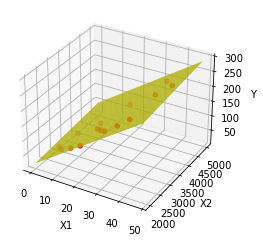

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
 
ax = plt.subplot(projection = '3d')
ax.set_xlabel('X1')  # 设置x坐标轴
ax.set_ylabel('X2')  # 设置y坐标轴
ax.set_zlabel('Y')  # 设置z坐标轴

#曲面 
theta= np.array([3.45261279,4.96004976,0.00919908])
x1, x2 = np.meshgrid(np.arange(0, 50,2),
                   np.arange(2000, 5000,2))
y=x1*theta[1]+x2*theta[2]+theta[0]
ax.plot_surface(x1,x2,y,color='y') 

#散点
x1 = data.iloc[:,1]
x2 = data.iloc[:,2]
y = data.iloc[:,3]
ax.scatter(x1, x2, y,color='r') 
plt.show()